# Starbucks Coffee/Tea Classification  

Given *data about Starbucks beverages*, let's try to predict whether a given beverage is **tea** or not.  
  
We will use a TensorFlow ANN to make our predictions.

# Getting Started

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import numpy as np
import pandas as pd

#import visualization library
import plotly.express as px

#import scaler and train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix

### dataset: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

The dataset belongs to Ford (car manufacture). The dataset provide the transaction of cars based on their model . The dataset has 17966 entries, and 9 columns.

The data contains the following fields:

1. model - > Ford Car Brands
2. year - >Production Year
3. price - >Price of car in $
4. transmission - > Automatic,Manual, Semi-Auto
5. mileage -> Number of miles traveled
6. fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
7. tax -> Annual Tax
8. mpg - > Miles per Gallon
9. engineSize - > Car's Engine Size



In [59]:
path = '/content/drive/MyDrive/dataset/portofolio/starbuck_tea/'

In [60]:
data = pd.read_csv(path +'starbucks_drinkMenu_expanded.csv')

In [61]:
data

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [63]:
data.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

# Fill Missing Values & Data Cleaning

In [64]:
#looking at data info ,we found that "total fat" was was object ,we should check why this happend.
data[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

we found that there is an outlier , we got 32 ,it should be 3.2 to match other values.

In [65]:
#replacing outlier we found before
data[' Total Fat (g)'] = data[' Total Fat (g)'].replace('3 2', '3.2')

In [66]:
#convert total fat to float ,so we could the correlation between the data
data[' Total Fat (g)'] = data[' Total Fat (g)'].astype(float)

In [67]:
#data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(float)

we found that our "caffeine" column has string in it . all the column should be in float

In [68]:
#replacing "varies" or string error we got earlier with nan
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)

In [69]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(float)

In [70]:
data.isna().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64

after replacing string with NaN ,we are left with 23 missing values.

In [71]:
#fill empty data with mean
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [72]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


our data is now completed and clean.

# Creating Labels

In [73]:
data.head(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [74]:
#create a new dataframe to make it easier for us to visualize
data_calories = data[['Beverage_category','Calories']]
data_calories.columns = ['DrinkMenu', 'Calories']
data_calories

,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,Frappuccino® Blended Crème,320
238,Frappuccino® Blended Crème,170
239,Frappuccino® Blended Crème,200
240,Frappuccino® Blended Crème,180


In [75]:
#create a new dataframe to make it easier for us to visualize
df_beverage = pd.DataFrame(data['Beverage_category'].value_counts())
df_beverage['BeverageCategory'] = df_beverage.index
df_beverage.columns = ['NumberofDrinks', 'BeverageCategory']
df_beverage = df_beverage.reset_index().drop('index', axis=1)
df_beverage

,NumberofDrinks,BeverageCategory
0,58,Classic Espresso Drinks
1,52,Tazo® Tea Drinks
2,40,Signature Espresso Drinks
3,36,Frappuccino® Blended Coffee
4,18,Shaken Iced Beverages
5,13,Frappuccino® Blended Crème
6,12,Frappuccino® Light Blended Coffee
7,9,Smoothies
8,4,Coffee


In [76]:
# create a bar chart of drink distribution from our dataset
fig= px.histogram(data ,y ='Beverage_category',color ='Beverage_category')
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.update_layout(plot_bgcolor='white' ,showlegend=False,
                  title={'text': "Drink Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', )
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', )
fig.show()

with the chart above , we could see that tea has 52 values.

In [77]:
# create a bar chart of beverage preparation distribution from our dataset
fig= px.histogram(data ,y ='Beverage_prep',color ='Beverage_prep')
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.update_layout(plot_bgcolor='white' ,showlegend=False,
                  title={'text': "Drink Prep Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', )
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', )
fig.show()

chart above tell us that many beverage preparation using soymilk

In [78]:
#starbuck calories sorted
data_calories.sort_values("Calories", ascending=False)

,DrinkMenu,Calories
84,Signature Espresso Drinks,510
215,Frappuccino® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,Tazo® Tea Drinks,450
...,...,...
0,Coffee,3
105,Tazo® Tea Drinks,0
104,Tazo® Tea Drinks,0
103,Tazo® Tea Drinks,0


In [79]:
# create a bar chart of total calories for each beverage 
fig= px.histogram(data ,y ='Beverage',x='Calories',color ='Beverage')

fig.update_layout(plot_bgcolor='white' ,showlegend=False,
                  title={'text': "Drink's Calories",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', )
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', )
fig.show()

tazo tea calories ranging from 1780 to 3300 calories.

In [80]:
fig =px.imshow(data.corr(),text_auto=True,aspect="auto",color_continuous_scale='blues')
fig.update_layout(
  title={'text': "Data Correlation",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

we found that total carbohydrates,cholesterol and sugars contribute the most for Calories

In [81]:
# looking at Correlation between sugar and calories
fig= px.scatter(data_frame=data, x="Calories", y=" Sugars (g)", color="Beverage_category")

fig.update_layout(plot_bgcolor='white',
                  title={'text': "Sugar vs Calories",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(showline=True, linewidth=2, linecolor='black',mirror =True )
fig.update_yaxes(showline=True, linewidth=1, linecolor='black',mirror =True )
fig.show()

we can say that there is correlation between sugars and calories ,more sugar mean more calories

In [82]:
# looking at Correlation between total carbohydrates and calories
fig= px.scatter(data_frame=data, x="Calories", y=" Total Carbohydrates (g) ", color="Beverage_category")

fig.update_layout(plot_bgcolor='white',
                  title={'text': "Carbohydrates vs Calories",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(showline=True, linewidth=2, linecolor='black',mirror =True )
fig.update_yaxes(showline=True, linewidth=1, linecolor='black',mirror =True )
fig.show()

we can say that there is correlation between  carbohydrates and calories ,more carbohydrates mean more calories

In [83]:
# looking at Correlation between Total fat and calories
fig= px.scatter(data_frame=data, x="Calories", y="Cholesterol (mg)" , color="Beverage_category")

fig.update_layout(plot_bgcolor='white',
                  title={'text': "Cholesterol vs Calories",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(showline=True, linewidth=2, linecolor='black',mirror =True )
fig.update_yaxes(showline=True, linewidth=1, linecolor='black',mirror =True )
fig.show()

we can say that there is correlation between  cholesterol and calories ,more cholesterol mean more calories

In [84]:
#looking at our unique category
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [85]:
# replacing tea value to 1 and other to 0
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [86]:
data

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Tea
0,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,0
1,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,0
2,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,0
3,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,0
4,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0.0,0
238,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0.0,0
239,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0.0,0
240,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0.0,0


In [87]:
#looking at our data distribution 
print("Class Distribution:")
print(data['Tea'].value_counts() / data.shape[0])

Class Distribution:
0    0.785124
1    0.214876
Name: Tea, dtype: float64


# Encoding Features

In [88]:
{column: len(data[column].unique()) for column in ['Beverage', 'Beverage_prep']}

{'Beverage': 33, 'Beverage_prep': 13}

In [89]:
# create a function to get dummies for each unique in beverage and beverage preparation
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [90]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [91]:
data

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,...,0,1,0,0,0,0,0,0,0,0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,...,0,0,0,0,0,1,0,0,0,0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320,3.2,0.4,0.0,0,250,67,1,64,5.0,...,0,0,0,0,1,0,0,0,0,0
238,170,0.1,0.1,0.0,0,160,39,0,38,4.0,...,0,0,0,0,0,0,1,0,0,0
239,200,3.5,2.0,0.1,10,160,39,0,38,3.0,...,0,0,0,0,0,0,0,0,0,1
240,180,1.5,0.2,0.0,0,160,37,1,35,3.0,...,0,0,0,0,1,0,0,0,0,0


# Final Cleaning

In [92]:
#looking at our data type/format
data.loc[:, 'Calories':'Tea'].dtypes

Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                float64
Tea                            int64
dtype: object

In [93]:
#replacing % with space 
data = data.applymap(lambda x: float(str(x).replace('%', '')))

In [94]:
data

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320.0,3.2,0.4,0.0,0.0,250.0,67.0,1.0,64.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
238,170.0,0.1,0.1,0.0,0.0,160.0,39.0,0.0,38.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
239,200.0,3.5,2.0,0.1,10.0,160.0,39.0,0.0,38.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240,180.0,1.5,0.2,0.0,0.0,160.0,37.0,1.0,35.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Splitting/Scaling

In [95]:
y = data['Tea'].astype(int).copy()
X = data.drop('Tea', axis=1).copy()

In [96]:
#using standard scaler to scale our data
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=64)

# Modeling/Training

In [98]:
X.shape

(242, 61)

In [99]:
#training our data using keras Artificial neural network
inputs = tf.keras.Input(shape=(61,))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

#using sigmoid activation since there is 2 category on our data (yes/no)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


#compile our data using adam optimizer 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

#using 32 batch size and 100 epochs
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ],
    verbose=0
)

# Results

In [100]:
#show our model evaluation
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9726 - auc: 1.0000


[0.04497871547937393, 0.9726027250289917, 1.0]

In [101]:
len(y_test)

73

In [102]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array((model.predict(X_test) >= 0.5), dtype=int))

In [103]:
# convert our result into confusion matrix
cm = confusion_matrix(y_true, y_pred)

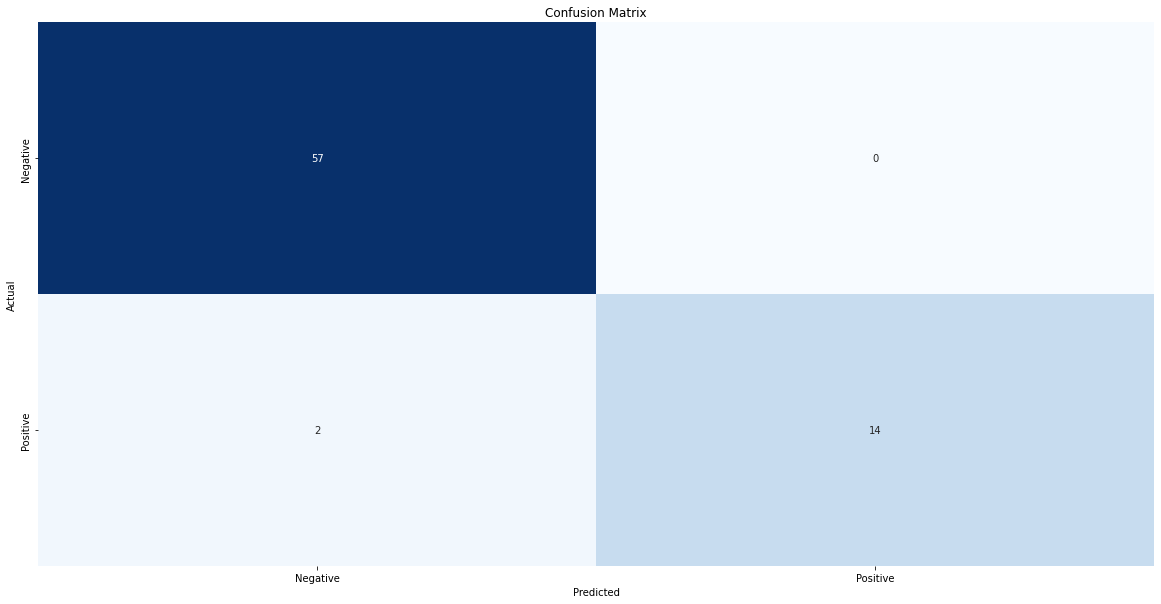

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

#visualize our confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)

plt.xlabel("Predicted")
plt.xticks(np.arange(2) + 0.5, ["Negative", "Positive"])

plt.ylabel("Actual")
plt.yticks(np.arange(2) + 0.5, ["Negative", "Positive"])

plt.title("Confusion Matrix")

plt.show()

# Summary

*   Our classification model (ANN) achieves an accuracy of 97% which is quite remarkable

Business strategy :

With our ANN model , we could easily determined whether the drink is tea or not , we could implement the idea to another drink or even another sector ,for example we could predict whether its a coffee or not. Another dataset case (zoo),we could predict whether an animal is a zoo animal or not.



